In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import math

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
women = sum(train_data.loc[train_data.Sex == 'female']["Survived"])
women

233

In [11]:
men = sum(train_data.loc[train_data.Sex == 'male']["Survived"])
men

109

In [17]:
data = [['female',women], ['male', men]]
survived = pd.DataFrame(data, columns = ['sex', 'survival_count'])

In [18]:
survived

,sex,survival_count
0,female,233
1,male,109


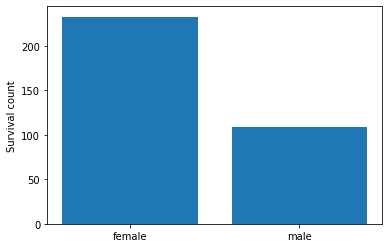

In [19]:
plt.bar(survived.sex, survived.survival_count)
plt.ylabel('Survival count')
plt.show()

In [20]:
zero = ['Age']
for column in zero:
    train_data[column] = train_data[column].replace(0, np.NaN)
    mean = int(train_data[column].mean(skipna=True))
    train_data[column] = train_data[column].replace(np.NaN, mean)
    
    
zero1 = ['Age']
for column in zero:
    test_data[column] = test_data[column].replace(0, np.NaN)
    mean = int(test_data[column].mean(skipna=True))
    test_data[column] = test_data[column].replace(np.NaN, mean)

In [21]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
y = train_data['Survived']
features = ['Pclass', 'Age','SibSp', 'Parch']
x_train =pd.get_dummies(train_data[features])
x_test =pd.get_dummies(test_data[features])

In [23]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
math.sqrt(len(y))

29.8496231131986

In [25]:
classifier = KNeighborsClassifier(n_neighbors = 29, p = 2, metric = 'euclidean')

In [26]:
classifier.fit(x_train, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [27]:
prediction = classifier.predict(x_test)

In [29]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Sex': test_data.Sex, 'Survived': prediction})

In [30]:
output

,PassengerId,Sex,Survived
0,892,male,0
1,893,female,0
2,894,male,0
3,895,male,0
4,896,female,0
...,...,...,...
413,1305,male,0
414,1306,female,1
415,1307,male,0
416,1308,male,0


In [31]:
output.to_csv('my_submission.csv', index=False)

Accuracy Score of this model is 0.69377